**Customer Churn prediction:-**

 Customer Churn prediction means knowing which customers are likely to leave or unsubscribe from your service. For many companies, this is an important prediction. This is because acquiring new customers often costs more than retaining existing ones. Once you’ve identified customers at risk of churn, you need to know exactly what marketing efforts you should make with each customer to maximize their likelihood of staying.




Customers have different behaviors and preferences, and reasons for cancelling their subscriptions. Therefore, it is important to actively communicate with each of them to keep them on your customer list. You need to know which marketing activities are most effective for individual customers and when they are most effective.

In [13]:
# importing the require libarary

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from google.colab import drive
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, classification_report, ConfusionMatrixDisplay


In [14]:
#load the data sheet from the drive
churn= pd.read_csv("https://raw.githubusercontent.com/DOMINION-JOHN1/bank_churn_prediction/main/Churn_Modelling.csv")

In [15]:
# Display information about the dataset, including data types and missing values
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [16]:
# Display information about the dataset, including data types and missing values
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [17]:
# Display summary statistics of the dataset
churn.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


#Auto EDA process

In [18]:
'''!pip install matplotlib
!pip install pandas-profiling
!pip install --upgrade pandas
!pip install --upgrade numpy
!pip install --upgrade matplotlib
!pip install --upgrade seaborn
!pip install --upgrade scikit-learn
!pip install sweetviz'''

'!pip install matplotlib\n!pip install pandas-profiling\n!pip install --upgrade pandas\n!pip install --upgrade numpy\n!pip install --upgrade matplotlib\n!pip install --upgrade seaborn\n!pip install --upgrade scikit-learn\n!pip install sweetviz'

Restart the kernal once again

In [20]:
!pip install sweetviz'''
import matplotlib.pyplot as plt
import sweetviz as sv

/bin/bash: -c: line 1: unexpected EOF while looking for matching `''
/bin/bash: -c: line 2: syntax error: unexpected end of file


ModuleNotFoundError: ignored

In [ ]:
'''# Analyze the dataset
report = sv.analyze(churn)

# Display the report
report.show_html("churn_eda_report.html")'''

#EDA  (Exploratory Data Analysis)

In [21]:
# Get the dimensions of the dataset (rows, columns)
churn.shape


(10000, 14)

In [22]:
# Get the total number of elements in the dataset
churn.size

140000

In [23]:
# Get the names of the columns in the dataset
churn.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [24]:
# Count missing values in each column
churn.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [25]:
# Identify and display duplicate rows based on the 'customer_id' column
duplicates = churn[churn.duplicated(subset=['CustomerId'], keep=False)]
print(duplicates)

Empty DataFrame
Columns: [RowNumber, CustomerId, Surname, CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited]
Index: []


# Data Visualization

In [26]:
# Set the figure size for the following visualization
plt.figure(figsize=(15, 5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Axes: xlabel='Exited', ylabel='count'>

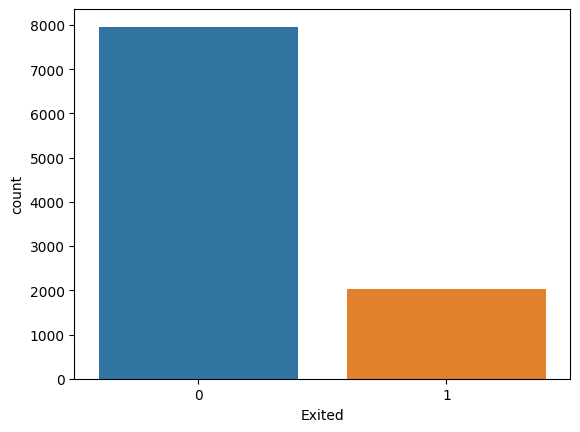

In [27]:
# Create a count plot to visualize the distribution of the 'exited' variable in the original dataset
sns.countplot(data=churn, x='Exited')


In [28]:
!pip install plotly

In [29]:

# Display the count of each class in the 'exited' variable
churn['Exited'].value_counts().to_frame()


,Exited
0,7963
1,2037


In [30]:
# Class Imbalance Resampling
# Select the majority and minority classes
churn_majority = churn[churn['Exited'] == 0]
churn_minority = churn[churn['Exited'] == 1]

In [31]:
from sklearn.utils import resample

In [33]:
from sklearn.utils import resample

# Upsample the minority class to match the size of the majority class
churn_minority_upsampled = resample(churn_minority, n_samples=len(churn_majority), replace=True, random_state=42)


In [34]:
# Combine the resampled majority class with the minority class
churn_df = pd.concat([churn_majority, churn_minority_upsampled])

In [35]:
# Set the figure size for the following visualization
plt.figure(figsize=(15, 5))


<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Axes: xlabel='Exited', ylabel='count'>

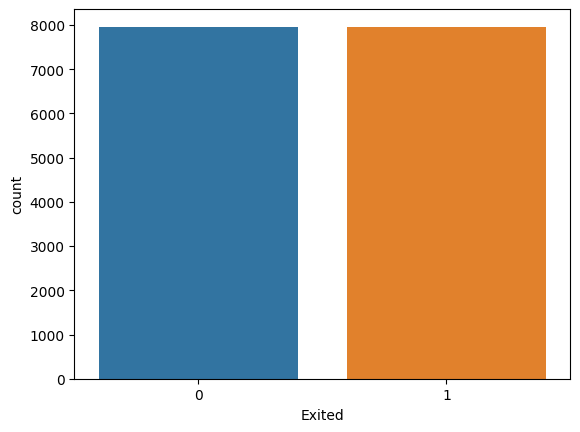

In [36]:
# Create a count plot to visualize the distribution of the 'exited' variable in the resampled dataset
sns.countplot(data=churn_df, x='Exited')

In [37]:
# Display the column names in the 'churn_df' DataFrame
churn_df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

<Axes: xlabel='Gender', ylabel='count'>

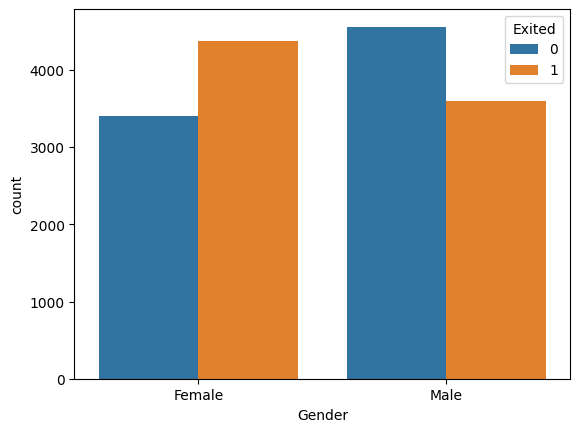

In [40]:
sns.countplot(x='Gender', data=churn_df,hue='Exited')

<Axes: xlabel='Geography', ylabel='count'>

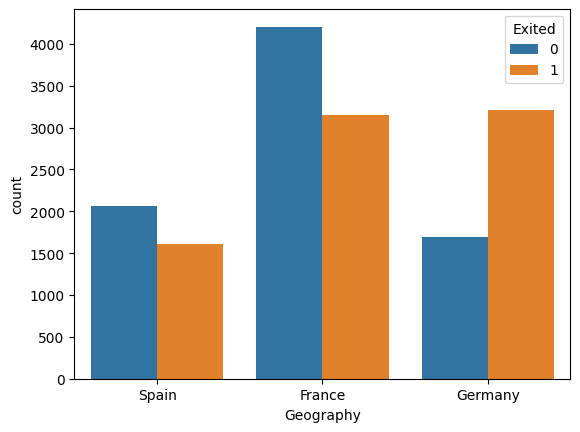

In [43]:
sns.countplot(x='Geography', data=churn_df,hue='Exited')

In [44]:
# Remove specific columns from the 'churn_df' DataFrame
# These columns include 'rownumber,' 'customerid,' 'surname,' 'geography,' and 'gender.'
churn_df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)


In [46]:
# Define the mapping of values
mapping = {"Spain": 1, "France": 2, "Germany": 3}

# Use the replace function to map the values in the "Geography" column
churn_df["Geography"] = churn_df["Geography"].replace(mapping)


In [47]:
churn_df['Gender'] = churn_df['Gender'].replace({'Male': 1, 'Female': 0})

In [48]:
# Compute the correlation matrix for the remaining columns in the 'churn_df' DataFrame
churn_df.corr()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003010,-0.012955,-0.012884,0.002117,0.006548,0.006463,0.001990,0.019424,-0.017717,-0.044285
Geography,-0.003010,1.000000,-0.017281,0.057660,0.011068,0.348705,-0.015974,0.023043,-0.022319,-0.009658,0.168985
Gender,-0.012955,-0.017281,1.000000,-0.039137,0.010803,0.012042,-0.030346,0.015309,0.022077,-0.015960,-0.121596
Age,-0.012884,0.057660,-0.039137,1.000000,-0.017553,0.049590,-0.024056,-0.023099,0.011224,-0.003999,0.352706
Tenure,0.002117,0.011068,0.010803,-0.017553,1.000000,0.002769,0.020536,0.022136,-0.030044,0.023952,-0.014121
Balance,0.006548,0.348705,0.012042,0.049590,0.002769,1.000000,-0.184336,-0.005761,-0.029862,0.000085,0.153366
NumOfProducts,0.006463,-0.015974,-0.030346,-0.024056,0.020536,-0.184336,1.000000,-0.010544,0.031860,0.016220,-0.049513
HasCrCard,0.001990,0.023043,0.015309,-0.023099,0.022136,-0.005761,-0.010544,1.000000,-0.021923,-0.016983,-0.011530
IsActiveMember,0.019424,-0.022319,0.022077,0.011224,-0.030044,-0.029862,0.031860,-0.021923,1.000000,-0.005190,-0.190884
EstimatedSalary,-0.017717,-0.009658,-0.015960,-0.003999,0.023952,0.000085,0.016220,-0.016983,-0.005190,1.000000,0.012024


<Axes: >

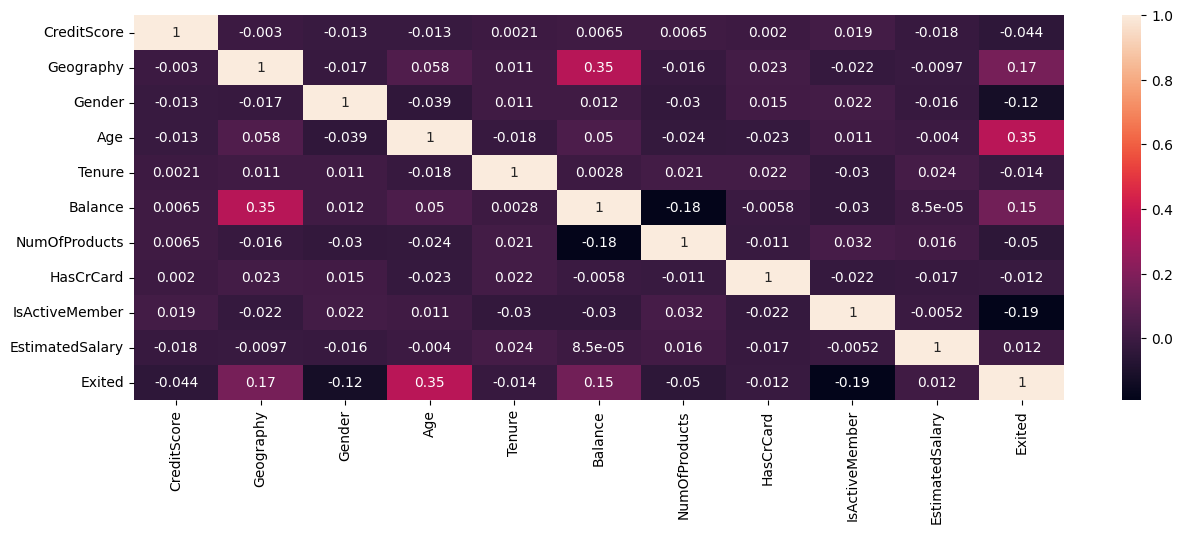

In [49]:
# Create a heatmap to visualize the correlation between different features
# The 'annot=True' parameter adds values to the heatmap
plt.figure(figsize=(15, 5))
sns.heatmap(churn_df.corr(), annot=True)

In [50]:
# Calculate the correlation of each feature with the 'exited' variable and store it in 'df_corr_exit'
df_corr_exit = churn_df.corr()['Exited'].to_frame()

<Axes: ylabel='Exited'>

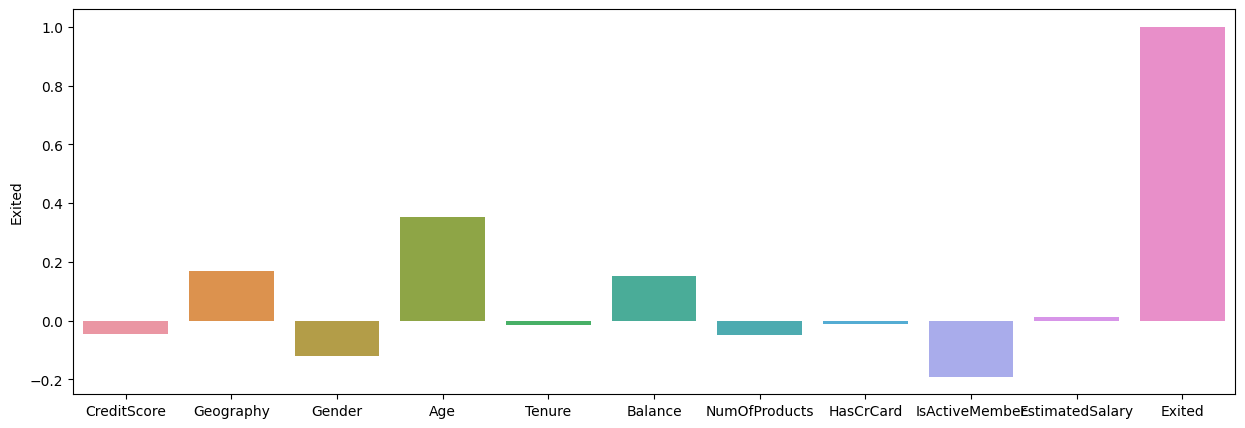

In [51]:
# Create a bar plot to visualize the correlation of each feature with the 'exited' variable
plt.figure(figsize=(15, 5))
sns.barplot(data=df_corr_exit, x=df_corr_exit.index, y='Exited')

In [52]:
# Separate the feature columns (independent variables) into 'x'
x = churn_df.drop(['Exited'], axis=1)
# Separate the target variable ('exited') into 'y'
y = churn_df['Exited']

#Spliting the Data Set

In [53]:
# Import the necessary function from scikit-learn
from sklearn.model_selection import train_test_split

In [54]:
# Split the data into training and testing sets
# x: Features (independent variables)
# y: Target variable (dependent variable)
# test_size: The proportion of the data to include in the test split (in this case, 30% for testing)
# random_state: A random seed for reproducibility
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)



In [55]:
# Print the dimensions of the resulting datasets
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((12740, 10), (3186, 10), (12740,), (3186,))

#Modeling and Evaluation

In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
x_train_scaled = scaler.fit_transform(x_train)
#y_train_scaled = scaler.fit_transform(y_train)

# Transform the test data using the same scaler
x_test_scaled = scaler.transform(x_test)
#y_test_scaled = scaler.transform(y_test)

In [58]:
# Import the logistic regression model from scikit-learn
from sklearn.linear_model import LogisticRegression

In [59]:
# Create a logistic regression model with a specified maximum number of iterations
lr = LogisticRegression(max_iter=500)

In [60]:
# Train the logistic regression model on the training data
lr.fit(x_train_scaled, y_train)
#lr.fit(x_train_scaled, y_train_scaled)

LogisticRegression(max_iter=500)

In [61]:
# Calculate the accuracy score on the training set
train_accuracy = lr.score(x_train_scaled, y_train)
print("Training Accuracy:", train_accuracy)

Training Accuracy: 0.7011773940345369


In [62]:
# Predict outcomes on the test set
y_pred = lr.predict(x_test_scaled)

In [64]:
# Import necessary functions for performance evaluation
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score, f1_score, ConfusionMatrixDisplay,classification_report


In [65]:

print(classification_report(y_pred,y_test))



              precision    recall  f1-score   support

           0       0.72      0.70      0.71      1651
           1       0.68      0.70      0.69      1535

    accuracy                           0.70      3186
   macro avg       0.70      0.70      0.70      3186
weighted avg       0.70      0.70      0.70      3186



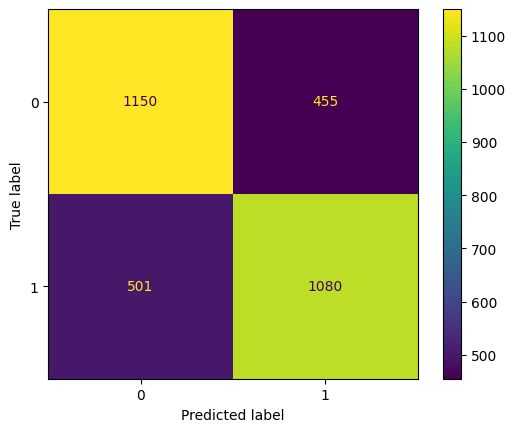

In [66]:
# Create a ConfusionMatrixDisplay object for visualization
cmd = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(y_test, y_pred, labels=lr.classes_),
    display_labels=lr.classes_
)
# Plot the confusion matrix
cmd.plot()

#k-Nearest Neighbors (KNN)

In [67]:
# Import and create a KNN classifier with k=3
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

In [68]:
# Train the KNN model on the training data
knn.fit(x_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [69]:
# Calculate the accuracy score on the training set for KNN
knn_train_accuracy = knn.score(x_train_scaled, y_train)
print("KNN Training Accuracy:", knn_train_accuracy)

KNN Training Accuracy: 0.9291993720565149


In [71]:
# Calculate the accuracy score on the test set for KNN
y_pred = knn.predict(x_test_scaled)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.78      0.93      0.85      1348
           1       0.94      0.81      0.87      1838

    accuracy                           0.86      3186
   macro avg       0.86      0.87      0.86      3186
weighted avg       0.87      0.86      0.86      3186



#Support Vector Classifier (SVC):

In [72]:
# Import and create an SVC classifier
from sklearn.svm import SVC
svc = SVC()

In [73]:
# Train the SVC model on the training data
svc.fit(x_train_scaled, y_train)

SVC()

In [75]:
# Calculate the accuracy score on the training set for SVC
svc_train_accuracy = svc.score(x_train_scaled, y_train)
print("SVC Training Accuracy:", svc_train_accuracy)

SVC Training Accuracy: 0.8167974882260597


In [76]:
y_pred = svc.predict(x_test_scaled)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1615
           1       0.80      0.81      0.81      1571

    accuracy                           0.81      3186
   macro avg       0.81      0.81      0.81      3186
weighted avg       0.81      0.81      0.81      3186



#Random Forest

In [77]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
from sklearn.model_selection import GridSearchCV


In [79]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}


In [80]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,  # Cross-validation folds
                           verbose=2,  # Higher values give more information
                           n_jobs=-1)  # Use all available CPU cores for parallelization


In [81]:
# Create a Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Fit the GridSearchCV object
grid_search.fit(x_train_scaled, y_train)

# Get the best model
best_rf = grid_search.best_estimator_

# Predictions using the best model
y_pred_rf = best_rf.predict(x_test_scaled)

print(classification_report(y_pred_rf,y_test))

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Print the best cross-validation score
print("Best cross-validation score:", grid_search.best_score_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1503
           1       0.98      0.92      0.95      1683

    accuracy                           0.95      3186
   macro avg       0.95      0.95      0.95      3186
weighted avg       0.95      0.95      0.95      3186

Best hyperparameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best cross-validation score: 0.9399529042386184


In [85]:
grid_search.score(x_train_scaled, y_train)

1.0

In [86]:
import pickle

# Save the SVC model to a pickle file
with open('rfc_model.pkl', 'wb') as model_file:
    pickle.dump(best_rf, model_file)

print("best_rf model saved as 'rfc_model.pkl'")

best_rf model saved as 'rfc_model.pkl'
